In [1]:
# Check all important packages can be imported
import matplotlib.pyplot as plt
import mat73
import pynwb
import sys

In [2]:

sys.path.append("../python") # Add the path to the python directory
from LoadMatData import load_mat_file

original_experiment_id = "HG13__180827_12_28_17"

mat_file = f"../data/{original_experiment_id}.mat"

# Load the .mat file
neuron_df_f, neuron_times, speed, whisker_motion_index, state, pca_dff, puff_events, = load_mat_file(mat_file)


Loading data from: ../data/HG13__180827_12_28_17.mat
Variables in the .mat file: dict_keys(['allAnalysed', 'allData', 'allEvents'])
Neuron data (shape: (41, 14280))
Neuron times data (shape: (41, 14280))
Speed data (shape: (2, 186450))
Whisker motion index data (shape: (2, 120361))
State data (shape: (2, 120361))
PCA of dF/F data (shape: (9, 14280))
Puff event data (shape: (2, 20))


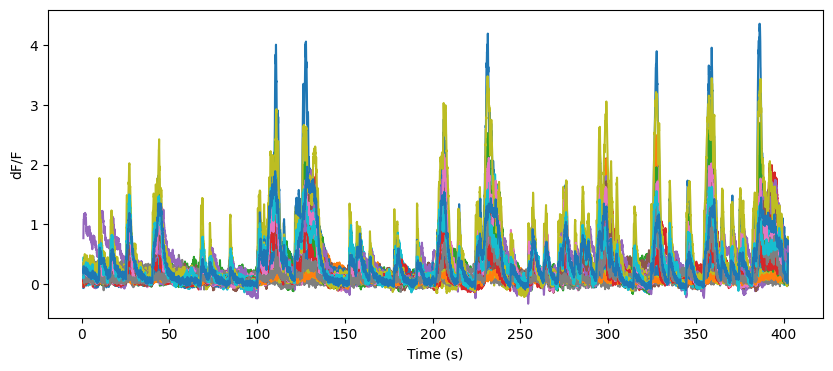

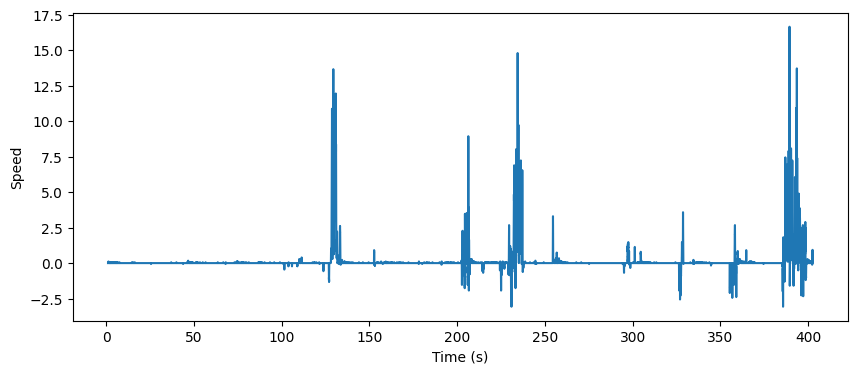

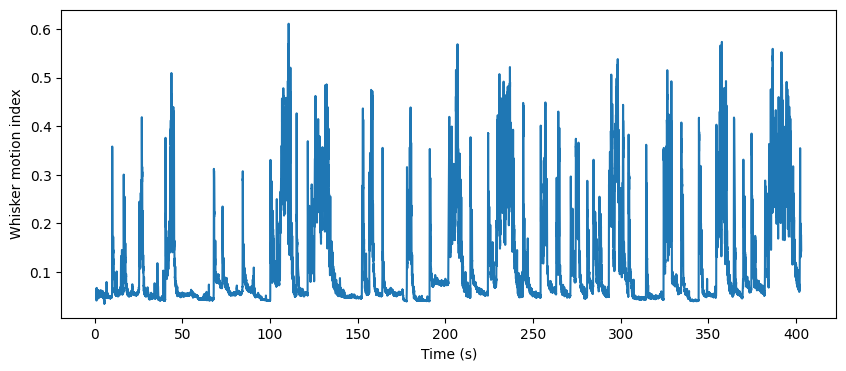

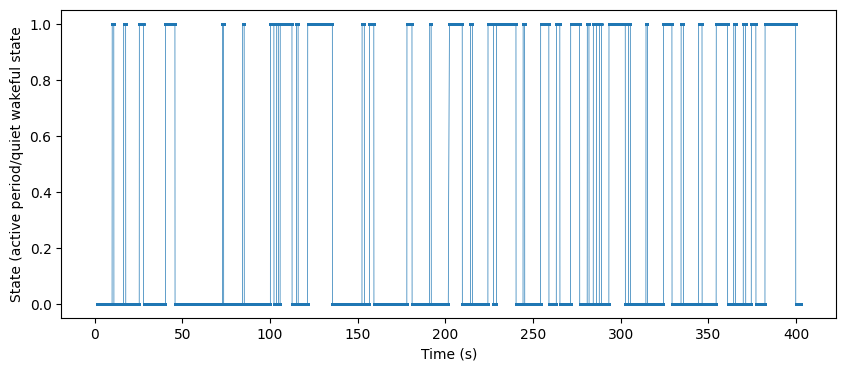

In [3]:
figsize=(10, 4)
plt.figure(figsize=figsize)

plt.xlabel("Time (s)")
plt.ylabel("dF/F")

for index in range(len(neuron_df_f)):
    plt.plot([t / 1000 for t in neuron_times[index]], neuron_df_f[index])

plt.figure(figsize=figsize)
plt.xlabel("Time (s)")
plt.ylabel("Speed")
plt.plot([t / 1000 for t in speed[0]], speed[1])

plt.figure(figsize=figsize)
plt.xlabel("Time (s)")
plt.ylabel("Whisker motion index")
plt.plot([t / 1000 for t in whisker_motion_index[0]], whisker_motion_index[1])

plt.figure(figsize=figsize)
plt.xlabel("Time (s)")
plt.ylabel("State (active period/quiet wakeful state")
plt.plot(
    [t / 1000 for t in state[0]], state[1], linewidth=0.5, marker=".", markersize=2
)